<a href="https://colab.research.google.com/github/cool60334/111-TibaMe-AI-03-Machine-Learning/blob/main/ML_Classification_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

In [ ]:
!pip install graphviz

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
# df.to_csv("iris.csv", encoding = "utf-8", index=False)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns # 讓圖變好看
%matplotlib inline

In [9]:
df.corr() # 相關係數表

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


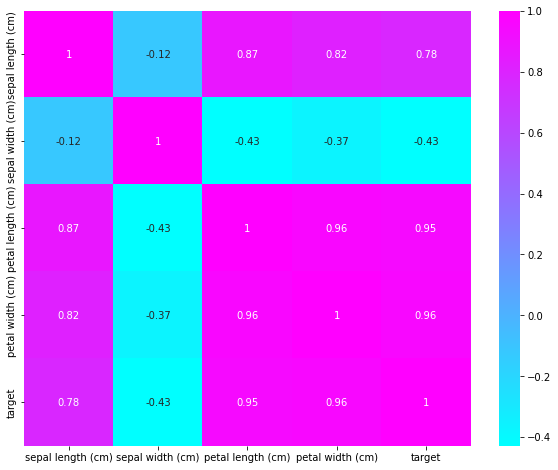

In [10]:
plt.figure(figsize=(10,8)) # 調整圖的大小(寬,高)
sns.heatmap(df.astype("float").corr(), cmap="cool", annot=True) # 熱度圖

In [11]:
from sklearn.model_selection import train_test_split # 回傳(特徵90%，特徵10%，目標90%，目標10%)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

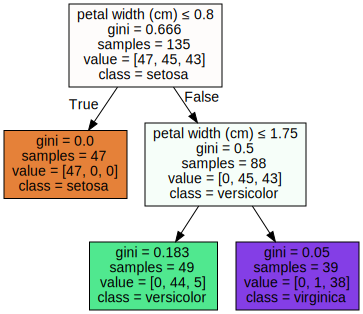

In [15]:
# 繪製決策樹

from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(clf, out_file=None, feature_names=iris["feature_names"],     
            class_names=iris["target_names"],filled=True, special_characters=True)
graph = graphviz.Source(g)
graph

In [16]:
pre = clf.predict(x_test)
print(f"預測結果:{list(pre)}")
print(f"真正標籤:{list(y_test)}")

預測結果:[1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2]
真正標籤:[1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2]


In [17]:
from sklearn.metrics import accuracy_score  # 模型準確率
print(f"預測成功機率: {accuracy_score(y_test, pre)}")

預測成功機率: 1.0


In [18]:
from sklearn.metrics import confusion_matrix  # 混淆矩陣
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2
0,3,0,0
1,0,5,0
2,0,0,7
